# Exploratory Data Analysis

This notebook file aims to present an exploratory data analysis of the following problem: house pricing. This analysis is divided into five parts:

1. Exploratory analysis
    * Data structure
    * Descritive statistics
2. Data modeling
4. Metrics
5. Conclusions

## Exploratory Analysis

### Understanding data structure

In [40]:
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import mean_absolute_error
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math 
from sklearn.metrics import r2_score
import plotly.express as px


In [8]:
df = pd.read_csv("ames_train.csv", sep=";")

In [9]:
df.head()

,Unnamed: 0,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,40000,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,40001,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,40002,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,40003,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,40004,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


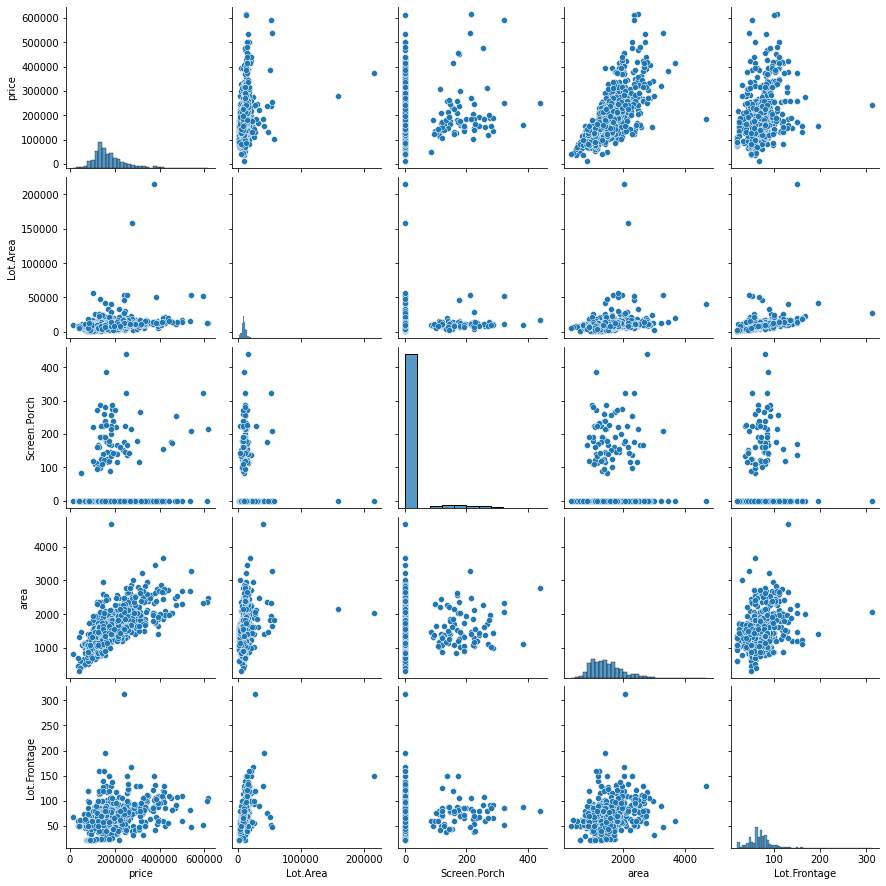

In [10]:
sns.pairplot(df[['price', 'Lot.Area', 'Screen.Porch', 'area', 'Lot.Frontage']])

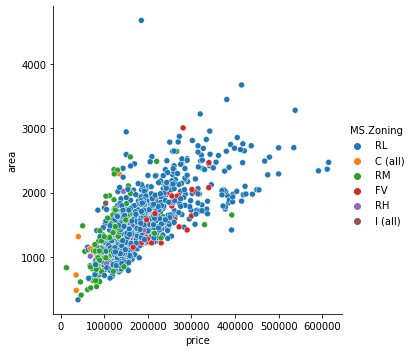

In [15]:
sns.relplot(x = 'price', y='area', hue='MS.Zoning', data=df)

<AxesSubplot:>

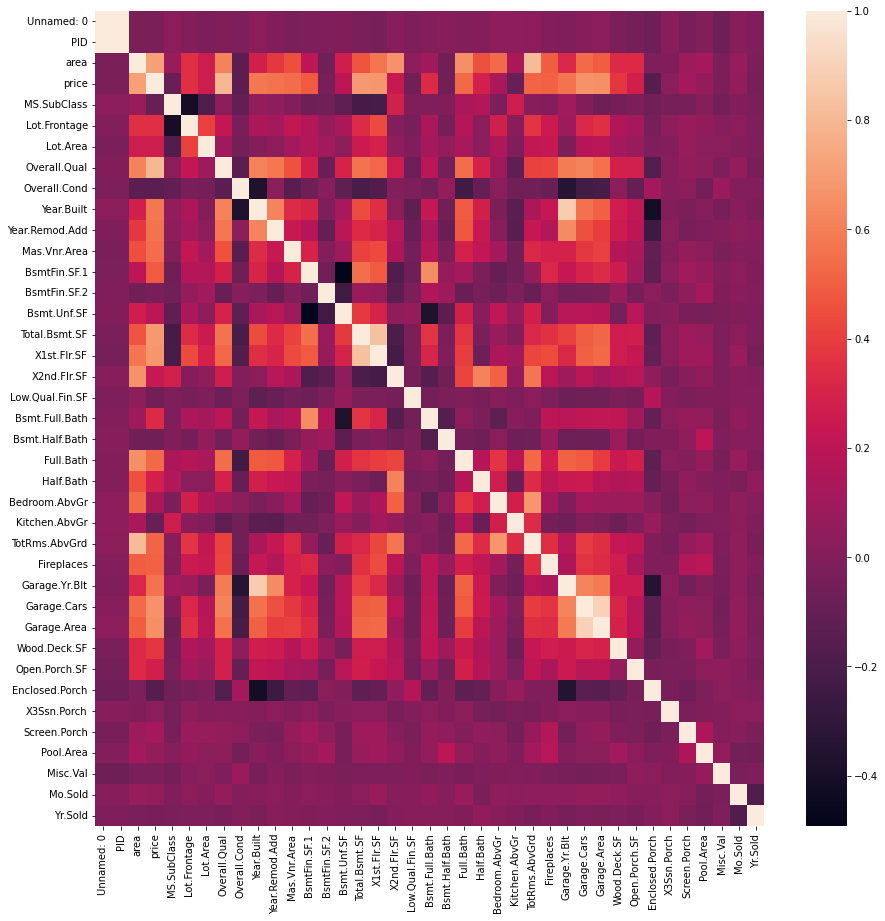

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())


## Data Modeling

In [16]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
newdf = newdf.iloc[: , 2:]
nan_columns = newdf.loc[:, newdf.isna().any()]
newdf.fillna(0, inplace=True)
newdf.isnull().sum().sum()


0

In [17]:
x = newdf.drop(['price'], axis=1).values
y = newdf['price'].values

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=0)
ml=LinearRegression()
ml.fit(x_train,y_train)
y_pred = ml.predict(x_test)


## Model evaluation

In [19]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
rs = r2_score(y_test, y_pred)

In [23]:
errors = [rs,rmse,rs]
pd.DataFrame(data={'rs': rs, 'mse': mse,'rmse':rmse}, index=[1])


,rs,mse,rmse
1,0.889871,8.444204e+08,29058.912872


In [25]:
diff = np.subtract(y_pred, y_test)

In [48]:
ind = np.arange(0, len(diff), 1)

In [51]:
 px.line(y_pred)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=0<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': '0',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '0',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([  0,   1,   2, ..., 297, 298, 299], dtype=int64),
              'xaxis': 'x',
              'y': array([192362.00449582, 198309.38305807, 229232.35497851, ..., 139608.6581357 ,
                          338456.65810424, 219504.21535362]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

In [52]:
!pip install nbformat 

You should consider upgrading via the 'C:\Users\luana\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


## Conclusions